<a href="https://colab.research.google.com/github/kipsangchepesa/DsCore12ModuleII-IPwk9/blob/main/Moringa_Data_Science_core12_ModuleII_W9_Independent_Project_2021_12_Nicholas_Kipsang_Mutai_IP_week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN: K-Nearest Neighbors. 
Here we are going to use Titanic dataset to carryout KNN machine learning 

#1.) Defining the Question:

This week's project requires us to implement a K-nearest neighbor (kNN) classifier on Titanic dataset to predict the chances of survival and death, given several variables such as Gender, Passenger class, Cabin they were in, parch i.e. parent and the child and many more, in the tragic incident that happenned longtime ago and will calculate the resulting metrics:


##Specifying the Question

1. Who survived in the titanic accident basing on the dataset?
2. Which is the strongest predictor of survival status?
3. What are the factors that affected the survival of a passenger?
4. Would one survive the titanic disaster given the attributes within the set eg. Age,Passanger class,Fare etc? (What we aim to predict)

## Defining the Metric for Sucsess
Our success will be determined by our ability to predict the survival status of a passenger with minimal error in classification.

##Understanding the context
RMS stands for Royal Mail Ship. The RMS Titanic had two sister ships
Olympic launched 20 October 1910, arrived at Jarrow for scrapping 13 October 1935and Britannic launched 26 February 1914, sunk by nine 21 November 1916.

There were only enough lifeboats for a third of the people on board there were 20 life boats on board, which would have held a capacity of 1178 people.
Meanwhile the capacity of Titanic was 3320 people.

##Experimental Design
This project will involve review and cleaning of the dataset while performing exploratory data analysis of both the training and testing set. The main objective, is the prediction of survival status of the passengers.
I wil do model optimization using different training and testing parameters with other optimization techiques that are fit for the model used.
Will do hyperparameter tuning to obtain the best estimatorand finally provide further recomendation on how to improve the classifier into the best model.

##Data Relevance
The data provided here in is relevant for analysis as it includes passenger information and the survival numbers of the actual titanic dataset. Our predictors are clearly defined and the target variable is clearly provided in the training set.
Pclass: refers to passenger class
Sbsp: refers to the siblings and spouse count.
Parch: refers to the parents and the children count.
Embarked implies where the traveler mounted from. ie Southampton(S), Cherbourg(C), and Queenstown(C).


#2.) Reading the Data

##Impoorting Libraries 

In [139]:
# Importing all the necessary libraries for my analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Feature Engineering ,Preprocessing and Modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Disable warnings
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

In [140]:
#train dataset
url=('https://archive.org/download/train5_202002/train%20%285%29.csv')
data=pd.read_csv(url)

In [141]:
#test dataset
test=pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

#3.) Checking the data

In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
# Checking the shape of train dataset and the datatypes
def Shape(data):
    data.shape
    types=data.dtypes
    print("The Titanic dataset has ",data.shape[0],"rows and ",data.shape[1]," columns ")
    print(types)
#calling the function
Shape(data)

The Titanic dataset has  891 rows and  12  columns 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [145]:
#checking for the test dataset
Shape(test)

The Titanic dataset has  418 rows and  11  columns 
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [146]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
# let's find out the missing values in train dataset

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing values in the age column which will be appropriate to fill with median or the mean while cleaning, also 687 missing values in the cabin column and two in the embarked which means the passengers are not known where the embarked on the Titanic ship

In [148]:
#checking for missing values in the test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 327 missing values in the cabin column, 86 missing values in the age column and 1 missing value in the Fare column.



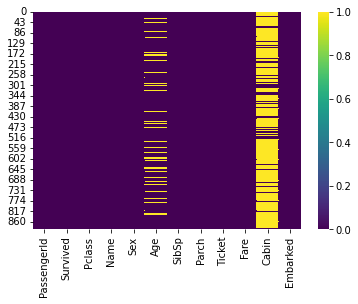

In [149]:
# Draw heat map to check numm values in train data
sns.heatmap(data.isnull(), cmap="viridis")

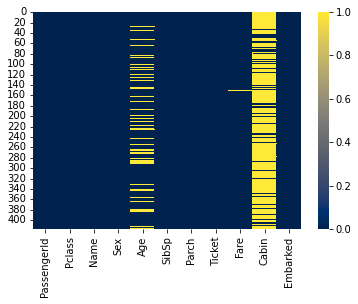

In [150]:
# Draw heat map to check numm values in test data
sns.heatmap(test.isnull(),cmap="cividis")

#4.) External Data Source Validation.
The train dataset and test data set are the same with one having our traget variable and therefore appropriate for analysis.


#5.) Tidying the dataset 

##Data cleaning 

In [151]:
def clean(data):
  data=data.drop(["PassengerId","Cabin","Name","Ticket" ], axis=1)#dropping the columns 
  cols=['SibSp','Parch','Fare','Age']
  for col in cols:
    data[col].fillna(data[col].median(), inplace=True)#filling missing values with median 

  data.Embarked.fillna("U", inplace=True)#Giving U to the unknown value in embarked column
  return data

data =clean(data)
test=clean(test)

In [152]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [153]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


##Rechecking the data using heatmap

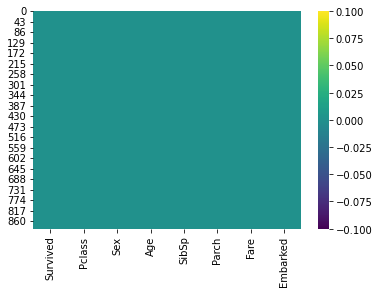

In [154]:
# Draw heat map to check number of missing values in train data
sns.heatmap(data.isnull(), cmap="viridis")

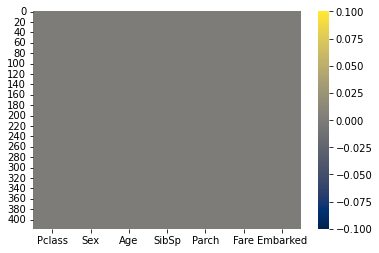

In [155]:
# Draw heat map to check missing  values in test data
sns.heatmap(test.isnull(), cmap="cividis")

#6.) Exploratory Data Analysis

trainning dataset 

In [156]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##Univariate analysis

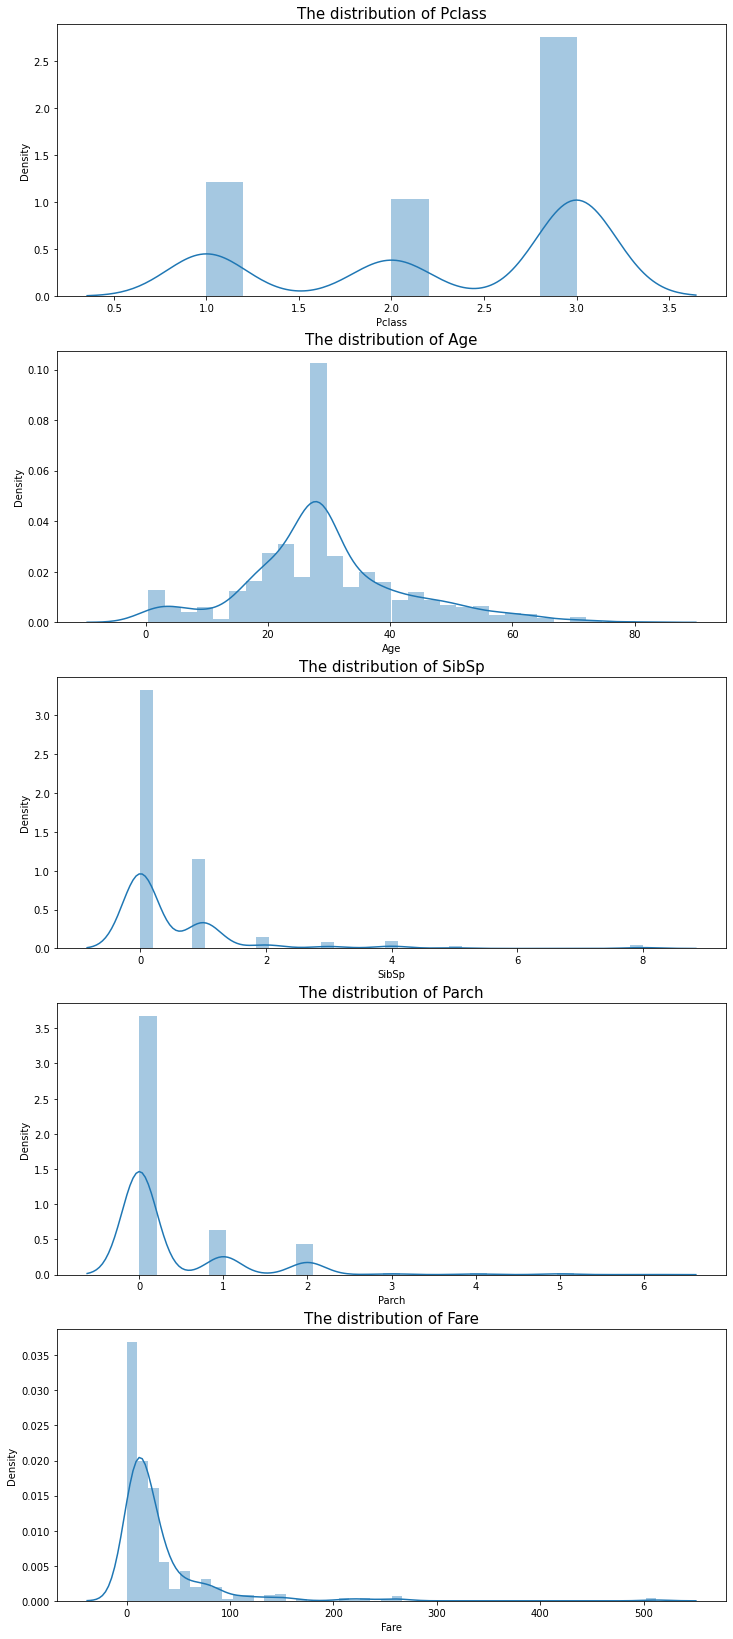

In [157]:
# Plotting distplots for the continous variables
train_cols=['Pclass','Age','SibSp','Parch','Fare']
fig,ax=plt.subplots(len(train_cols),figsize=(12,29))
for i,cols in enumerate(train_cols):
    sns.distplot(data[cols],kde=True,ax=ax[i])
    ax[i].set_title("The distribution of "+format(cols),fontsize=15)
plt.show()

Observation from the distplot for both discrete and continuous numerical columns:
1. Passenger class was multi modal and categorized at first class, second class and 3rd class denoted as (1.0, 2.0 and 3.0). Most passengers were however found to be in the 3rd class followed by 1st class and the least being second class with few passengers
2. Age being continuous is heavily tailed around the extreemities with an passangers having ages even above 80 years. It can be noted that many passengers were families with children and grandchildren.
3. The number of siblings and spouses of a person onboard was concentrated around zero with the tail exteending to 8. The same can be reported for the parents and children, these extended upto 6 but very low in counts.
It can be understood from the passengers class that even the fares paid by most passangers were on the lower rate

##Bivariate Analysis

In [158]:
# defining a function to plot relationship between two variables
def barplots(data,col1,col2):
      plt.figure(figsize=(10,6))
      sns.barplot(x=col1, y=col2,data=data, palette='Oranges_r')
      plt.title('The relationship between '+str(col1)+' and those who '+str(col2),fontsize=15)
      plt.show()

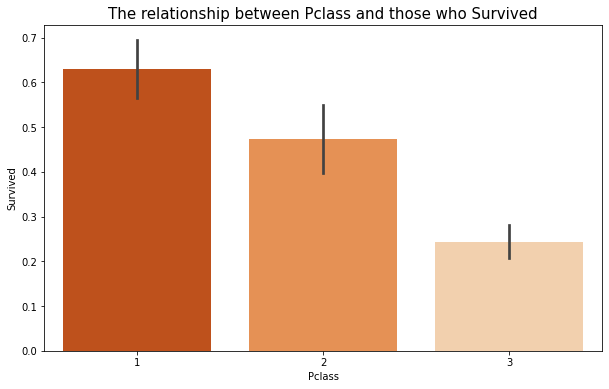

In [159]:
barplots(data,'Pclass','Survived')

Most of the passenger who were in 1st class survived followed by those in second class and those in third class were the one whom most lost their life

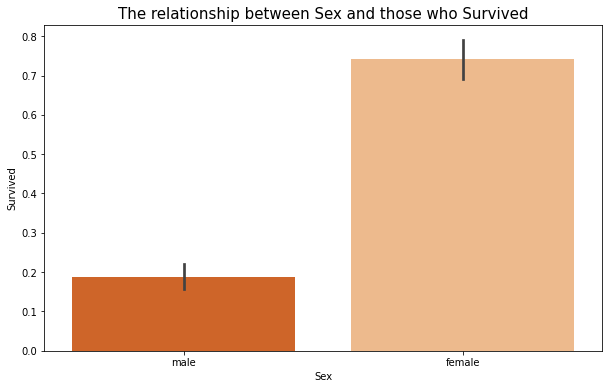

In [160]:
barplots(data,'Sex','Survived')

Females survived in a greater number as compared to men

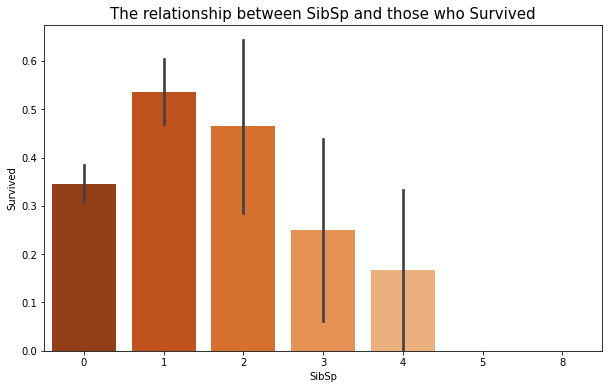

In [161]:
barplots(data,'SibSp','Survived')


With an increased number of siblings and spouses the survival rate was deterotiating. This can be attributed to parents love towards their children, we can say they were trying to safe them and the aging factor because as we grow old there are more siblings we have.
However the passengers without siblings and spouses onboard survived at a lower rate as compared to those with one and two.

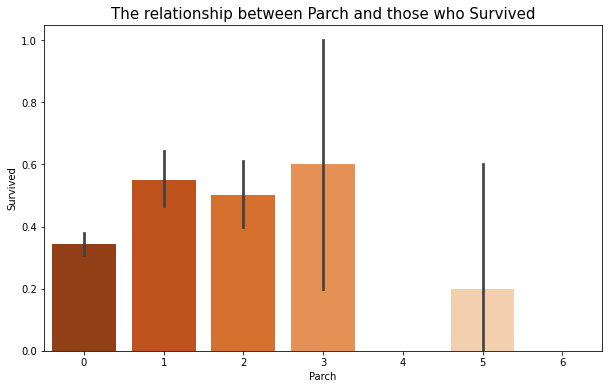

In [162]:
barplots(data,'Parch','Survived')


With an increased number of parents and children onboard  the survival rate was less.
an exception is however seen with people without parents and siblings on board their survival rate was lower than those with 1 to 3.

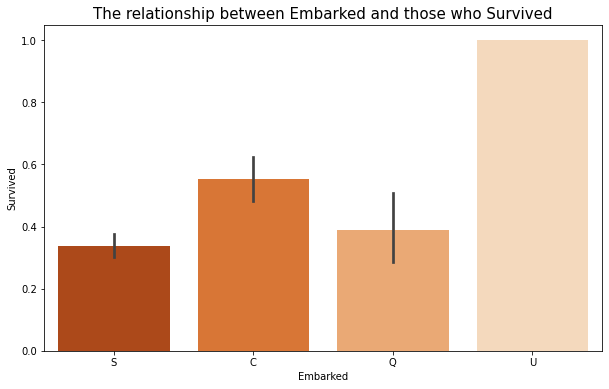

In [163]:
barplots(data,'Embarked','Survived')


U was the unknown embarking point and it was only one this means the passenger whose unknown embarking survived and Cherboug had the highest number of suvivors as compared to Queenstown and Southampton respectively

#7.) Implementing the Solution

##Feature engineering 

In [164]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [165]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


From the above feature engineer the categorical columns to be numerical to enable analysis using the label encoder.
Sex and embarked are the only ones that should be transformed.

##Label encoding 

In [166]:
 from sklearn import preprocessing 
 le=preprocessing.LabelEncoder()
 cols=["Sex","Embarked"]

 for col in cols:
   data[col]=le.fit_transform(data[col])
   test[col]=le.transform(test[col])
   print(le.classes_)
print("The trainning dataset\n" 
      + str(data.head(5)))
print("===============================================================")
print("The test dataset\n"
      + str(test.head(5)))

['female' 'male']
['C' 'Q' 'S' 'U']
The trainning dataset
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2
The test dataset
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2


Randomly partitioning the train data set into 80 % 

In [167]:

data= data.sample(frac=0.8,random_state=200).reset_index().drop(columns='index')
data.shape

(713, 8)

Data Preparation and features extraction

In [168]:

X_feat=data.drop(columns=['Survived'],axis=1)
X=X_feat.values
# Extracting my target variable
Y=data['Survived'].values
# # The test set contains all Features therefore will rename it to
X_real_feat=test
X_real_test=X_real_feat.values

In [169]:
#printing the shape 
print(X.shape)
print(X_real_test.shape)

(713, 7)
(418, 7)


Checking for individual (VIF)  variance Inflation factor for Multicorlinearlity detection

In [170]:
X_feat.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.163197,-0.340424,0.059922,-0.007698,-0.559876,0.136976
Sex,0.163197,1.000000,0.088906,-0.133145,-0.217985,-0.175967,0.093364
Age,-0.340424,0.088906,1.000000,-0.261450,-0.176286,0.103216,-0.030594
SibSp,0.059922,-0.133145,-0.261450,1.000000,0.432511,0.145360,0.069666
Parch,-0.007698,-0.217985,-0.176286,0.432511,1.000000,0.212098,0.087541
Fare,-0.559876,-0.175967,0.103216,0.145360,0.212098,1.000000,-0.201501
Embarked,0.136976,0.093364,-0.030594,0.069666,0.087541,-0.201501,1.000000


Carrying out VIF on train and test set

In [171]:
# A function for calculating the variance inflation factor
def VIF(data):
    vif=pd.DataFrame()
    vif['Features']=data.columns
    vif['VIF_scores']=[variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
    return vif

In [172]:
print("The VIF for features\n" +str(VIF(X_feat))) 
print("=========================================")
print("The VIF for test dataset, the real dataset\n" +str(VIF(X_real_feat))) 


The VIF for features
   Features  VIF_scores
0    Pclass    5.715409
1       Sex    3.050749
2       Age    4.575755
3     SibSp    1.633298
4     Parch    1.624982
5      Fare    1.643859
6  Embarked    4.546063
The VIF for test dataset, the real dataset
   Features  VIF_scores
0    Pclass    5.403139
1       Sex    2.802648
2       Age    4.948194
3     SibSp    1.418543
4     Parch    1.390887
5      Fare    2.034638
6  Embarked    3.776862


The sets are indpependent of each other, there's no cause for alarm as all of the are below a score of 10

##Standardizing our dataset

In [173]:
# Scaling the datasets to standardize them to reasonable features with the mean and standard deviation
sc=StandardScaler()
# Scaling my features
X=sc.fit_transform(X) 
# This has been done so that the model can lean about the training features and also scale while in test it will only transform the features to a scalled value
X_real_test=sc.transform(X_real_test)

##Creating a baseline model

###1. Logistic regression

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# y=data["Survived"]
y=Y
# X=data.drop("Survived",axis=1)
X=X

X_train, X_val,y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

clf=LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)


###prediction

In [193]:
predictions=clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.7622377622377622

In [194]:
dfpredics=pd.DataFrame(clf.predict(test),columns=["Survived"])
dfpredics['Survived'].value_counts()


0    329
1     89
Name: Survived, dtype: int64

From the baseline model, Logistic regression it gave me 76% with 255 passengers not surviving and 163 passengers surviving.

###KNN 

In [183]:
 
def model (pred,target,test_size):
    # Splitting further into train test so that the model can learn Y using the training set as my test set doesnt have a target variable
    X_train,X_test,Y_train,Y_test=train_test_split(pred,target,test_size=test_size,random_state=42)
    # Instantiating KNN classifier
    knn=KNeighborsClassifier(n_neighbors=5)
    # Fitting my training set to the model
    knn.fit(X_train,Y_train)
    # Predicting from the knn classifier
    Y_real_pred=knn.predict(X_test)
    #  Evaluating the model
    ac=accuracy_score(Y_test,Y_real_pred)
    cm=confusion_matrix(Y_test,Y_real_pred)
    cr=classification_report(Y_test,Y_real_pred)
    print(ac,'\n',cm,'\n',cr)

In [178]:
model(X,Y,0.2)

0.7482517482517482 
 [[74 19]
 [17 33]] 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        93
           1       0.63      0.66      0.65        50

    accuracy                           0.75       143
   macro avg       0.72      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



The KNN model is 74 % accurate . This is not such a good predictor as the number of false positives,and false negatives is considerably high (17 and 12 respectively). The ratio of correctly classified prediction is high and our precision is not up to standard. Of all positives only 74 % of the total was correcly labeld as positive. In quest to evaluate the model i will tune my model to obtain the best K and weights to be used as i adjust the proportion of sampling dataset for validation

###Hyperparameter tunning 


###### Getting my parameters to use

In [181]:
!pip install scikit-learn

In [185]:
# Defining the function for my best model
def optimum(pred,target,test_size):
    # I will tune the metric and k neighbours to the best estimator to obtain the best model
    X_train,X_test,Y_train,Y_test=train_test_split(pred,target,test_size=test_size,random_state=42)
    params={"metric":['minkowski','eucledian','cosine_similarity'],
        "n_neighbors": np.arange(1,13),
        "p":np.arange(1,3),
        "weights":['uniform','distance']}
    #Instantiating my model
    knn=KNeighborsClassifier()
    # Tuning the model to obtain the best parameters
    knn_search=GridSearchCV(estimator=knn,param_grid=params,cv=5,verbose=1)
    # Fitting my training set 
    knn_search.fit(X_train,Y_train)
    print("My best parameters are",knn_search.best_params_)
    # Obtaining the best estimator to make our prediction
    best_knn_model=knn_search.best_estimator_
    # Making our prediction using it
    Y_best_real_pred=best_knn_model.predict(X_test)
    # Evaluating the best model
    ac_best=accuracy_score(Y_test,Y_best_real_pred)
    cm_best=confusion_matrix(Y_test,Y_best_real_pred)
    cr_best=classification_report(Y_test,Y_best_real_pred)
    print(ac_best,'\n',cm_best,'\n',cr_best)  
    

####Optimizing the model

In [187]:
# Using the best parameters to test for improvement in my model accuracy and missclasification ratio.
optimum(X,Y,0.2)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
My best parameters are {'metric': 'minkowski', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.7552447552447552 
 [[75 18]
 [17 33]] 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        93
           1       0.65      0.66      0.65        50

    accuracy                           0.76       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.76      0.76      0.76       143



Our model accuracy improved significantly with a 1 % margin. 

#8.) Challenging the solution

Using different sample split

In [188]:
# # Using a sample size of 70% for training and 30 % for test
model(X,Y,0.3)

0.7850467289719626 
 [[112  20]
 [ 26  56]] 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       132
           1       0.74      0.68      0.71        82

    accuracy                           0.79       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



The model accuracy increase further to 79% 

In [189]:
# Using the best parameters to test for improvement in my model accuracy and missclasification ratio using a different sample size.
optimum(X,Y,0.3)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
My best parameters are {'metric': 'minkowski', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.7710280373831776 
 [[109  23]
 [ 26  56]] 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       132
           1       0.71      0.68      0.70        82

    accuracy                           0.77       214
   macro avg       0.76      0.75      0.76       214
weighted avg       0.77      0.77      0.77       214



In [190]:
# # Using a sample size of 60% for training and 40 % for test
model(X,Y,0.4)

0.7797202797202797 
 [[149  29]
 [ 34  74]] 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       178
           1       0.72      0.69      0.70       108

    accuracy                           0.78       286
   macro avg       0.77      0.76      0.76       286
weighted avg       0.78      0.78      0.78       286



In [191]:
# Rechecking the performance of the model using 60% training data and 40 % testing data
optimum(X,Y,0.4)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
My best parameters are {'metric': 'minkowski', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.7762237762237763 
 [[149  29]
 [ 35  73]] 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       178
           1       0.72      0.68      0.70       108

    accuracy                           0.78       286
   macro avg       0.76      0.76      0.76       286
weighted avg       0.77      0.78      0.77       286



The accuracy of Knn model in this analysis is at 78% 